# Sea Ice

## Concepts

### What is {term}`sea ice`?  Well, ice that floats in the ocean.
”Sea” here can mean floating in a sea or an ocean

I.e. there’s no separate quantity called “ocean ice”

To be distinguished from land ice: {term}`ice sheet`s and {term}`glacier`s

Recall: land ice melt contributes to sea level rise, sea ice melt does not

Consists of many individual ice {term}`floe`s.  An ice {term}`floe` is a single piece of floating ice.  Floes can range in size from a few cm to 100s of km.

### What is Arctic sea ice?  Well, sea ice in the Arctic.
To be distinguished from Antarctic sea ice: sea ice surrounding Antarctica
 
### Metrics of sea ice

{term}`sea ice area`: Looking down from space, the total area covered by {term}`sea ice`.  Often considered for the Arctic as a whole and, separately, for the Antarctic as a whole.  Physical dimensions are area, so units meters squared, but often expressed in millions of square kilometers: $10^6\text{ km}^2$.

{term}`sea ice age`: How long a given piece of {term}`sea ice` has existed, starting from when it first formed.  Dimensions are time.

{term}`sea ice concentration`: The fraction of a specified grid box's area that is covered by {term}`sea ice`.  Dimensionless, and thus unitless; typically expressed in percent.  (Can depend to some extent on the precise grid box boundaries.)

{term}`sea ice extent`: The area spanned by grid boxes with {term}`sea ice concentration` exceeding a specified threshold, usually taken to be 15%.   Physical dimensions are area, so units meters squared, but often expressed in millions of square kilometers: $10^6\text{ km}^2$.  (As for sea ice concentration itself, can depend to some extent on the precise grid box boundaries.)

{term}`sea ice thickness`: The vertical extent of a given piece of {term}`sea ice`, from its bottom below the ocean surface to its top just above the ocean surface.  Physical dimensions are distance, so SI units meters.




## Observations
### Satellite
We have very good observations of sea ice during the satellite era, meaning since 1979.

From the IPCC AR6 WG1 Ch 9: "Arctic sea ice area is calculated based on measurements by passive microwave satellite sensors that provide near-continuous measurements of gridded, pan-Arctic sea ice concentration from 1979 onwards"

Sea ice is much colder than nearby ocean.  Satellites use this temperature difference to detect where the ice is.

### Trends

Arctic {term}`sea ice area` is trending downward year-round, including during its September minimum, but also at all other times of the year.  The same is true for {term}`sea ice extent`.

Conversely, Antarctic sea ice area and extent show little long-term trend up to ~2022.  But since then, 2023 was a record low year, and 2025 is tracking to be nearly as low.  This is possibly the beginning of a longer-term decline, although the precise roles of anthropogenic forcings vs. natural variability remain to be determined.

What are the uncertainties?  Again from IPCC AR6 WG1 Ch 9: "Irreducible uncertainties in the conversion of thermal microwave brightness temperature to sea ice concentration, and choices in algorithm design, cause uncertainties in observed Arctic sea ice area, which are far smaller than the observed sea ice loss."


### Detection and attribution
What role did human activities play in the trends in Arctic sea ice over the past several decades, compared to internal variability and to natural forcings?  And likewise for the Antarctic?

## How sea ice forms, grows, and melts


## 

## Preliminaries

In [2]:
import pandas as pd

## Load NSIDC sea ice index data

The [National Snow and Ice Data Center](https://nsidc.org/home) provides observational data of daily sea ice extent, separately for the Arctic and for the Antarctic, free for public download.  It is saved as plain-text CSV.  We'll use `pandas` to load this data directly from their server.

First we'll try loading it naively using [`pandas.read_csv`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html):

In [3]:
url = "https://noaadata.apps.nsidc.org/NOAA/G02135/north/daily/data/N_seaice_extent_daily_v3.0.csv"
df = pd.read_csv(url)
df.head()

,Year,Month,Day,Extent,Missing,Source Data
0,YYYY,MM,DD,10^6 sq km,10^6 sq km,Source data product web sites: http://nsidc.o...
1,1978,10,26,10.231,0.000,['/ecs/DP1/PM/NSIDC-0051.001/1978.10.26/nt_19...
2,1978,10,28,10.420,0.000,['/ecs/DP1/PM/NSIDC-0051.001/1978.10.28/nt_19...
3,1978,10,30,10.557,0.000,['/ecs/DP1/PM/NSIDC-0051.001/1978.10.30/nt_19...
4,1978,11,01,10.670,0.000,['/ecs/DP1/PM/NSIDC-0051.001/1978.11.01/nt_19...


So we see the columns from left to right are: the Year, Month, and Day of the data, followed by the Arctic sea ice extent in millions of square kilometers; probably some indicator of the amount of data missing for that day also in millions of square kilometers; and finally a path to the specific file or files in their system that this day's data comes from.

Good start, but we need to do some cleaning before we can really dive in to this data.

First, notice that the 1st "data" row---meaning the one right below the column titles---isn't actually data, but a continuation of the CSV file's header: the header spans the first two rows, rather than just one.  The first row gives the name of the columns, and the second row gives additional information for each column.  As a result of this two-line header, the second row of the header incorrectly gets treated as the first row of data.  To fix that, we'll re-run `read_csv` specifying that the header is on the first line (which, because python numbering starts at zero, is line number 0) and that we should skip the 2nd line (line number 1) before reading in the actual data.  

We accomplish that using the `skiprows` keyword argument to `read_csv`.  Note that if we say `skiprows=1`, it skips *all* the rows up to row 1, so row 0 and row 1.  In this case, we want it to skip *only* row 1, which we can do by passing `skiprows` a list of the specific line numbers to skip.  In this case, that's just line 1, so `skiprows=[1]`.

We'll also add another keyword argument, `skipinitialspace=True`, to make sure the resulting column names don't start with nuisance blank spaces.

In [16]:
df = pd.read_csv(url, header=0, skiprows=[1], skipinitialspace=True)
df.head()

,Year,Month,Day,Extent,Missing,Source Data
0,1978,10,26,10.231,0.0,['/ecs/DP1/PM/NSIDC-0051.001/1978.10.26/nt_197...
1,1978,10,28,10.420,0.0,['/ecs/DP1/PM/NSIDC-0051.001/1978.10.28/nt_197...
2,1978,10,30,10.557,0.0,['/ecs/DP1/PM/NSIDC-0051.001/1978.10.30/nt_197...
3,1978,11,1,10.670,0.0,['/ecs/DP1/PM/NSIDC-0051.001/1978.11.01/nt_197...
4,1978,11,3,10.777,0.0,['/ecs/DP1/PM/NSIDC-0051.001/1978.11.03/nt_197...


That looks better.  As one additional cleaning step, let's combine the year, month, and day columns into a single datetime column.  Then, we'll make that date column be the dataframe's **index**, meaning more or less the *independent variable* that all the other columns in the DataFrame are defined against:

In [17]:
# Convert Year, Month, Day to datetime index
df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])
df = df.set_index('Date')

# Drop the original Year, Month, Day columns
df = df.drop(columns=['Year', 'Month', 'Day'])

# Inspect the result
df


,Extent,Missing,Source Data
Date,,,
1978-10-26,10.231,0.000,['/ecs/DP1/PM/NSIDC-0051.001/1978.10.26/nt_197...
1978-10-28,10.420,0.000,['/ecs/DP1/PM/NSIDC-0051.001/1978.10.28/nt_197...
1978-10-30,10.557,0.000,['/ecs/DP1/PM/NSIDC-0051.001/1978.10.30/nt_197...
1978-11-01,10.670,0.000,['/ecs/DP1/PM/NSIDC-0051.001/1978.11.01/nt_197...
1978-11-03,10.777,0.000,['/ecs/DP1/PM/NSIDC-0051.001/1978.11.03/nt_197...
...,...,...,...
2025-03-27,14.026,0.000,['/ecs/DP4/PM/NSIDC-0081.002/2025.03.26/NSIDC0...
2025-03-28,14.027,0.000,['/ecs/DP4/PM/NSIDC-0081.002/2025.03.27/NSIDC0...
2025-03-29,14.011,0.000,['/ecs/DP4/PM/NSIDC-0081.002/2025.03.28/NSIDC0...


Ah, there we go: a timeseries of daily Arctic sea ice extent, along with information about missing data and data provenance, dating from October 26th, 1978 to March 31, 2025.

In fact, we could accomplish all of this at the time the data is loaded by using two additional keyword arguments: `parse_dates={"Date": [0, 1, 2]}, index_col="Date"`.  Once we add those, we have all of our data cleaning handled all at once, as soon as the data is loaded from the web:



In [29]:
df_nh = pd.read_csv(url, header=0, skiprows=[1], skipinitialspace=True, parse_dates={"Date": [0, 1, 2]}, index_col="Date")
df_nh

/var/folders/3g/s0brcg452zn0z3962qt_0pn00000gn/T/ipykernel_15429/1672902463.py:1: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df_nh = pd.read_csv(url, header=0, skiprows=[1], skipinitialspace=True, parse_dates={"Date": [0, 1, 2]}, index_col="Date")


,Extent,Missing,Source Data
Date,,,
1978-10-26,10.231,0.000,['/ecs/DP1/PM/NSIDC-0051.001/1978.10.26/nt_197...
1978-10-28,10.420,0.000,['/ecs/DP1/PM/NSIDC-0051.001/1978.10.28/nt_197...
1978-10-30,10.557,0.000,['/ecs/DP1/PM/NSIDC-0051.001/1978.10.30/nt_197...
1978-11-01,10.670,0.000,['/ecs/DP1/PM/NSIDC-0051.001/1978.11.01/nt_197...
1978-11-03,10.777,0.000,['/ecs/DP1/PM/NSIDC-0051.001/1978.11.03/nt_197...
...,...,...,...
2025-03-27,14.026,0.000,['/ecs/DP4/PM/NSIDC-0081.002/2025.03.26/NSIDC0...
2025-03-28,14.027,0.000,['/ecs/DP4/PM/NSIDC-0081.002/2025.03.27/NSIDC0...
2025-03-29,14.011,0.000,['/ecs/DP4/PM/NSIDC-0081.002/2025.03.28/NSIDC0...


In [32]:
pd.read_csv(url, header=0, skiprows=[1], skipinitialspace=True, parse_dates={"Date": [0, 1, 2]}, index_col="Date")
df_nh

/var/folders/3g/s0brcg452zn0z3962qt_0pn00000gn/T/ipykernel_15429/2487785940.py:1: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  pd.read_csv(url, header=0, skiprows=[1], skipinitialspace=True, parse_dates={"Date": [0, 1, 2]}, index_col="Date")


,Extent,Missing,Source Data
Date,,,
1978-10-26,10.231,0.000,['/ecs/DP1/PM/NSIDC-0051.001/1978.10.26/nt_197...
1978-10-28,10.420,0.000,['/ecs/DP1/PM/NSIDC-0051.001/1978.10.28/nt_197...
1978-10-30,10.557,0.000,['/ecs/DP1/PM/NSIDC-0051.001/1978.10.30/nt_197...
1978-11-01,10.670,0.000,['/ecs/DP1/PM/NSIDC-0051.001/1978.11.01/nt_197...
1978-11-03,10.777,0.000,['/ecs/DP1/PM/NSIDC-0051.001/1978.11.03/nt_197...
...,...,...,...
2025-03-27,14.026,0.000,['/ecs/DP4/PM/NSIDC-0081.002/2025.03.26/NSIDC0...
2025-03-28,14.027,0.000,['/ecs/DP4/PM/NSIDC-0081.002/2025.03.27/NSIDC0...
2025-03-29,14.011,0.000,['/ecs/DP4/PM/NSIDC-0081.002/2025.03.28/NSIDC0...


Now, let's visualize this Arctic sea ice extent data with a simple plot:

<Axes: xlabel='Date'>

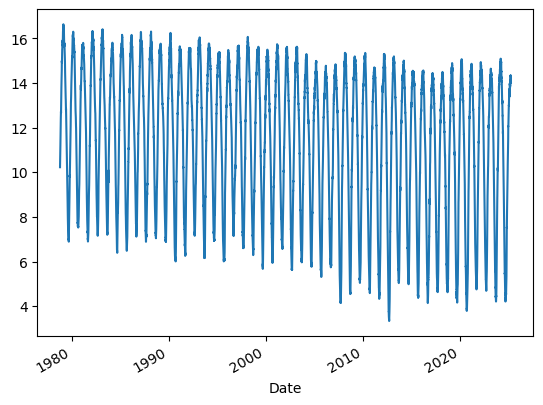

In [21]:
df["Extent"].plot()

What things do you notice?

- A strong seasonal cycle
- A clear long-term decreasing trend
- In addition to the seasonality and the overall trend, some year-to-year variations as well.

How much variability is there on shorter timescales?  It's hard to tell when plotted this way, but it does look like there are some smaller "kinks" in the data.  Let's zoom in to one single year, 2010 say, to get a better idea:

<Axes: xlabel='Date'>

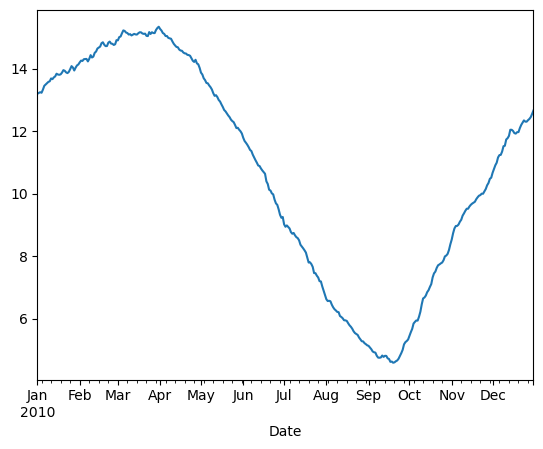

In [23]:
df.loc["2010-01-01":"2010-12-31", "Extent"].plot()

Indeed, it looks like there are some wiggles up and down from one day to the other.  Cool!

In [ ]:
# 

Now let's look at the Antarctic data.  We'll append the string `_sh` to that

In [25]:
url_antarctica = "https://noaadata.apps.nsidc.org/NOAA/G02135/south/daily/data/S_seaice_extent_daily_v3.0.csv"
df_antarctica = pd.read_csv(url_antarctica, header=0, skiprows=[1], skipinitialspace=True)
df_antarctica





,Year,Month,Day,Extent,Missing,Source Data
0,1978,10,26,17.624,0.000,['/ecs/DP1/PM/NSIDC-0051.001/1978.10.26/nt_197...
1,1978,10,28,17.803,0.000,['/ecs/DP1/PM/NSIDC-0051.001/1978.10.28/nt_197...
2,1978,10,30,17.670,0.000,['/ecs/DP1/PM/NSIDC-0051.001/1978.10.30/nt_197...
3,1978,11,1,17.527,0.000,['/ecs/DP1/PM/NSIDC-0051.001/1978.11.01/nt_197...
4,1978,11,3,17.486,0.000,['/ecs/DP1/PM/NSIDC-0051.001/1978.11.03/nt_197...
...,...,...,...,...,...,...
15297,2025,3,27,3.778,0.000,['/ecs/DP4/PM/NSIDC-0081.002/2025.03.26/NSIDC0...
15298,2025,3,28,3.838,0.000,['/ecs/DP4/PM/NSIDC-0081.002/2025.03.27/NSIDC0...
15299,2025,3,29,4.001,0.000,['/ecs/DP4/PM/NSIDC-0081.002/2025.03.28/NSIDC0...
15300,2025,3,30,4.121,0.000,['/ecs/DP4/PM/NSIDC-0081.002/2025.03.29/NSIDC0...


<Axes: >

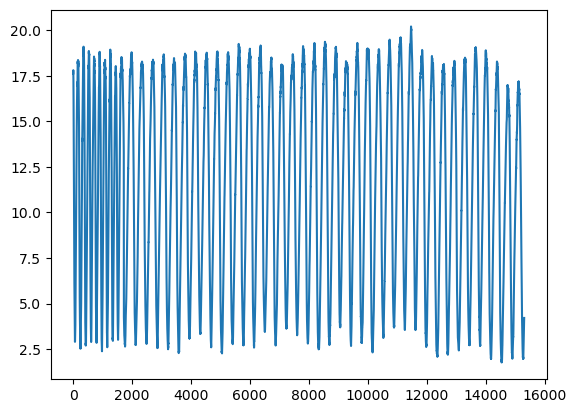

In [26]:
df_antarctica["Extent"].plot()